# Initializing

In [2]:
import pandas as pd
import scipy 
import matplotlib
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns 
%matplotlib inline
#import warnings
#warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv("elon_tweets.csv", sep=';')

In [4]:
data.drop(columns='Unnamed: 0', inplace=True)

In [5]:
data.set_index('tweet_id', inplace=True)

In [6]:
data.sort_values('date', ascending=False)

,date,time_recoded,access_point,language,text,mentions,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_cat,sentiment_val
tweet_id,,,,,,,,,,,,,
1590519242805641216,2022-11-10,01:38:32,Twitter for iPhone,en,"@micsolana In days to come, we’ll add granular...",micsolana,348,133,1557,115241851,130,neutral,0.730545
1590505894210834434,2022-11-10,00:45:30,Twitter for iPhone,en,@micsolana We are changing the text to say “Le...,micsolana,1224,598,9464,115241851,130,neutral,0.587615
1590391902662455296,2022-11-09,17:12:32,Twitter for iPhone,en,@SciGuySpace Finally,SciGuySpace,464,275,7223,115241851,130,neutral,0.496665
1590398147968520192,2022-11-09,17:37:21,Twitter for iPhone,en,@lawrencekitema @SpaceNews_Inc Congratulations!,"lawrencekitema,SpaceNews_Inc",178,167,3831,115241851,130,positive,0.981080
1590392135395979265,2022-11-09,17:13:27,Twitter for iPhone,en,@SpaceNews_Inc Rockets that aren’t reusable ha...,SpaceNews_Inc,1756,1274,22648,115241851,130,negative,0.676390
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142881284019060736,2011-12-03,08:22:07,Twitter for iPhone,en,That was a total non sequitur btw,_,27,9,50,107415763,122,negative,0.506732
142880871391838208,2011-12-03,08:20:28,Twitter for iPhone,en,"Great Voltaire quote, arguably better than Twa...",_,23,29,50,107415763,122,positive,0.558608
142179928203460608,2011-12-01,09:55:11,Twitter Web Client,en,Went to Iceland on Sat to ride bumper cars on ...,_,33,22,189,107415714,122,positive,0.973320


In [7]:
data.head()

,date,time_recoded,access_point,language,text,mentions,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_cat,sentiment_val
tweet_id,,,,,,,,,,,,,
1575581872913907712,2022-09-29,20:22:46,Twitter for iPhone,en,@MuskUniversity True,MuskUniversity,377,127,3007,107414837,122,neutral,0.600531
1575509494510993408,2022-09-29,15:35:09,Twitter for iPhone,en,Needs be able to get from Starbase to South Pa...,_,1604,1416,33556,107414837,122,neutral,0.845257
1575508878300618752,2022-09-29,15:32:42,Twitter for iPhone,en,@WholeMarsBlog Off-label use 🤣,WholeMarsBlog,754,492,23482,107414837,122,neutral,0.753030
1575508498430820352,2022-09-29,15:31:12,Twitter for iPhone,en,Cybertruck will be waterproof enough to serve ...,_,12870,9732,124276,107414837,122,positive,0.611826
1575507735298207744,2022-09-29,15:28:10,Twitter for iPhone,en,@phibetakitten Submarines use electric motors ...,phibetakitten,509,347,8189,107414837,122,neutral,0.859709


# Tweet count evolution over time

In [8]:
b=pd.DataFrame(data['date'].value_counts()).reset_index()
b.columns=["date", "tweet_count"]
bc= b.sort_values("date")
bc

,date,tweet_count
2198,2010-06-04,1
1742,2011-12-01,2
1786,2011-12-03,2
2201,2011-12-04,1
968,2011-12-21,7
...,...,...
1144,2022-11-06,6
20,2022-11-07,35
158,2022-11-08,20
148,2022-11-09,20


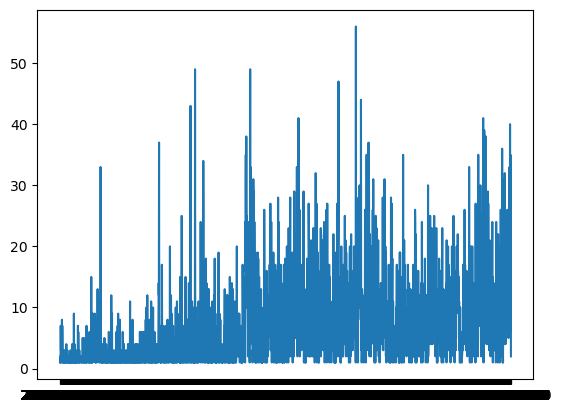

In [9]:
plt.plot(bc['date'],bc["tweet_count"])
plt.xlabel="Date"
plt.ylabel="Number of tweets"
plt.show()

# Mention counts = exploding the data

In [10]:
mentions_counts=pd.DataFrame(data['mentions'].value_counts()).reset_index()
mentions_counts.columns=("Mentions", "Count")

In [11]:
mentions_counts[['mention1', 'mention2']] = mentions_counts['Mentions'].str.split(',', 1, expand=True)
mentions_counts[['mention2', 'mention3']] = mentions_counts['mention2'].str.split(',', 1, expand=True)
mentions_counts[['mention3', 'mention4']] = mentions_counts['mention3'].str.split(',', 1, expand=True)
mentions_counts[['mention4', 'mention5']] = mentions_counts['mention4'].str.split(',', 1, expand=True)
mentions_counts[['mention5', 'mention6']] = mentions_counts['mention5'].str.split(',', 1, expand=True)
mentions_counts

/var/folders/5g/jskfzb8j377fh7wl3_rxvkrc0000gn/T/ipykernel_8995/2531171937.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  mentions_counts[['mention1', 'mention2']] = mentions_counts['Mentions'].str.split(',', 1, expand=True)
/var/folders/5g/jskfzb8j377fh7wl3_rxvkrc0000gn/T/ipykernel_8995/2531171937.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  mentions_counts[['mention2', 'mention3']] = mentions_counts['mention2'].str.split(',', 1, expand=True)
/var/folders/5g/jskfzb8j377fh7wl3_rxvkrc0000gn/T/ipykernel_8995/2531171937.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  mentions_counts[['mention3', 'mention4']] = mentions_counts['mention3'].str.split(',', 1, expand=True)
/var/folders/5g/jskfzb8j377fh7wl3_rxvkrc

,Mentions,Count,mention1,mention2,mention3,mention4,mention5,mention6
0,_,4488,_,None,None,None,None,None
1,WholeMarsBlog,241,WholeMarsBlog,None,None,None,None,None
2,BillyM2k,141,BillyM2k,None,None,None,None,None
3,teslaownersSV,136,teslaownersSV,None,None,None,None,None
4,PPathole,123,PPathole,None,None,None,None,None
...,...,...,...,...,...,...,...,...
8382,"flcnhvy,Ford",1,flcnhvy,Ford,None,None,None,None
8383,"lulusdave,Tesla",1,lulusdave,Tesla,None,None,None,None
8384,CybertruckN,1,CybertruckN,None,None,None,None,None
8385,hentesla,1,hentesla,None,None,None,None,None


In [12]:
mentions_counts.isna().sum()
# Keeping the 6 mentions (8036 empty in the last column, out of 8387)

Mentions       0
Count          0
mention1       0
mention2    3207
mention3    5945
mention4    7191
mention5    7771
mention6    8036
dtype: int64

In [13]:
len(mentions_counts["Mentions"])

8387

In [14]:
df2=mentions_counts[['mention2','Count']]
df2.columns=["mention", "count"]
df3=mentions_counts[['mention3','Count']]
df3.columns=["mention", "count"]
df4=mentions_counts[['mention4','Count']]
df4.columns=["mention", "count"]
df5=mentions_counts[['mention5','Count']]
df5.columns=["mention", "count"]
df6=mentions_counts[['mention6','Count']]
df6.columns=["mention", "count"]

In [15]:
mentions_counts.drop(columns=["Mentions", "mention2", "mention3", "mention4", "mention5", "mention6"], inplace=True)
df1=mentions_counts[['mention1','Count']]
df1.columns=["mention", "count"]

In [16]:
mentionsdf=pd.concat([df1, df2, df3, df4, df5, df6])
mentionsdf.sort_values(('count'), ascending=False)

,mention,count
0,_,4488
0,None,4488
0,None,4488
0,None,4488
0,None,4488
...,...,...
2190,None,1
2191,None,1
2192,None,1
2193,Pflax1,1


# Finding most mentioned people/ accounts

In [17]:
groupedM=mentionsdf.groupby('mention').agg('sum')

In [18]:
gm2=groupedM.reset_index().sort_values('count', ascending=False)

### Top 100 mentions

In [19]:
topmentions=gm2.iloc[1:101]
topmentions

,mention,count
3021,Tesla,816
1034,Erdayastronaut,684
2835,SpaceX,653
2324,PPathole,491
6317,teslaownersSV,475
...,...,...
3108,TheBabylonBee,33
3408,WhatsupFranks,32
597,CathieDWood,32
1502,Jason,31


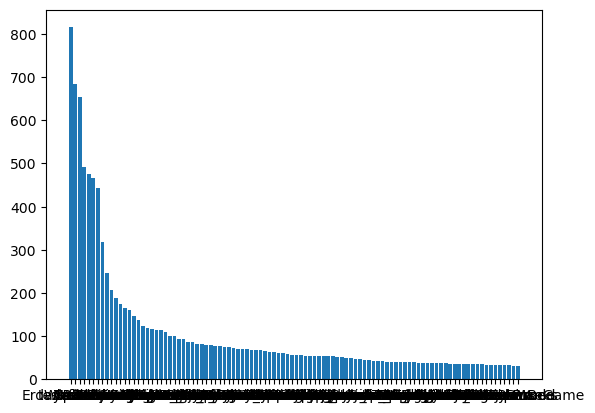

In [20]:
plt.bar(topmentions['mention'],topmentions['count'] )
plt.show()

### Top mentions (over 100 times)

In [21]:
toptopmentions=gm2.iloc[1:24]
toptopmentions

,mention,count
3021,Tesla,816
1034,Erdayastronaut,684
2835,SpaceX,653
2324,PPathole,491
6317,teslaownersSV,475
4474,flcnhvy,466
3410,WholeMarsBlog,443
3091,Teslarati,319
428,BillyM2k,246
2149,NASASpaceflight,206


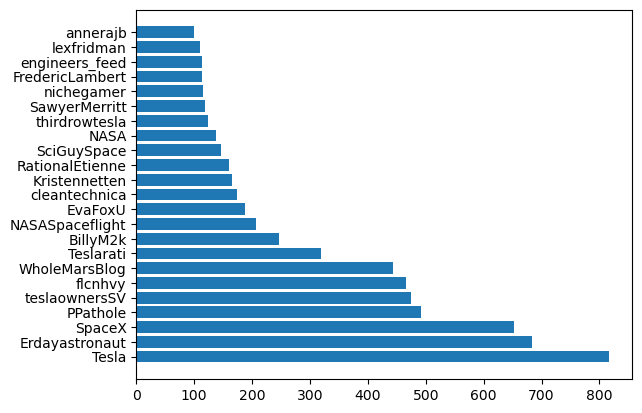

In [22]:
plt.barh(toptopmentions['mention'],toptopmentions['count'])
plt.show()

# Is there a difference between addressed tweets and not-addressed tweets ? 

In [23]:
list_most_mentioned=list(toptopmentions['mention'])
list_most_mentioned

['Tesla',
 'Erdayastronaut',
 'SpaceX',
 'PPathole',
 'teslaownersSV',
 'flcnhvy',
 'WholeMarsBlog',
 'Teslarati',
 'BillyM2k',
 'NASASpaceflight',
 'EvaFoxU',
 'cleantechnica',
 'Kristennetten',
 'RationalEtienne',
 'SciGuySpace',
 'NASA',
 'thirdrowtesla',
 'SawyerMerritt',
 'nichegamer',
 'FredericLambert',
 'engineers_feed',
 'lexfridman',
 'annerajb']

In [24]:
def findmostmentioned(x):
    lst=list_most_mentioned
    numer=0
    for i in lst:
        if i in x:
            numer+=1
    if numer==0:
        return False
    else:
        return True

# that returns true/false depending on whether an item from list_most_mentioned is in the cell 

#function apply to the df series 

#data[~np.isin(data['mentions'], list_most_mentioned)]
# 

In [25]:
data['mostment']=data['mentions'].apply(findmostmentioned)

In [26]:
tweetswithtop=data.loc[data['mostment']==True]
tweetswithouttop=data.loc[data['mostment']==False]

In [27]:
twt=tweetswithtop.describe()
#5 691 rows 
# mean of reply count is 430
# mean of RT count is 477
# mean likes is 8507
twt

,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_val
count,5691.000000,5691.000000,5691.000000,5.691000e+03,5691.000000,5691.000000
mean,429.511861,477.438763,8507.173783,1.075600e+08,122.068881,0.704614
std,835.040715,1436.134914,15998.348055,8.673015e+05,0.739187,0.149370
min,0.000000,2.000000,2.000000,1.074129e+08,122.000000,0.353829
25%,66.000000,60.000000,1422.000000,1.074134e+08,122.000000,0.572084
50%,169.000000,155.000000,3458.000000,1.074150e+08,122.000000,0.690902
75%,463.000000,417.000000,8765.000000,1.074153e+08,122.000000,0.828674
max,11649.000000,63333.000000,286275.000000,1.152419e+08,130.000000,0.992806


In [28]:
twot=tweetswithouttop.describe()
# 12 644 rows 
# mean of reply count is 2363
# mean of RT count is 4246
# mean likes is 45 175
twot

,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_val
count,12644.000000,12644.000000,1.264400e+04,1.264400e+04,12644.000000,12644.000000
mean,2363.030212,4246.230860,4.517583e+04,1.076342e+08,122.145524,0.711914
std,7960.875513,15258.679326,1.313044e+05,1.144207e+06,1.069159,0.153829
min,0.000000,0.000000,2.000000e+00,1.074129e+08,122.000000,0.355407
25%,68.000000,80.000000,1.226750e+03,1.074135e+08,122.000000,0.574439
50%,298.000000,422.000000,6.315000e+03,1.074149e+08,122.000000,0.703533
75%,1172.250000,2256.000000,3.084925e+04,1.074155e+08,122.000000,0.842833
max,194791.000000,686210.000000,4.799760e+06,1.152419e+08,130.000000,0.992991


# Can we evaluate tweets based on engagement ? 

<Axes: >

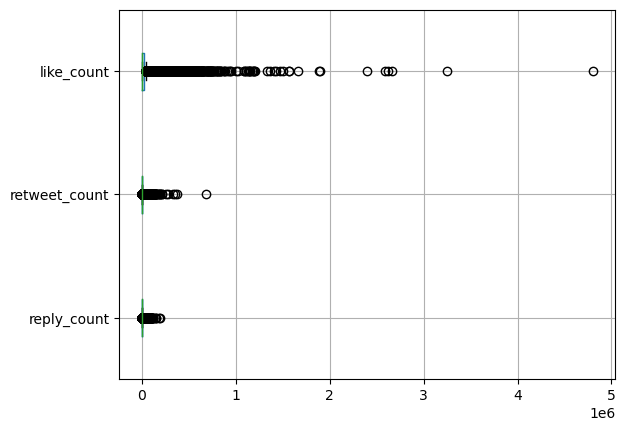

In [30]:
data.boxplot(column=['reply_count', 'retweet_count', 'like_count'], vert=False)

# BONUS : WHO ARE THE OUTLIERS ? 

### What happens if we remove the outliers ? 

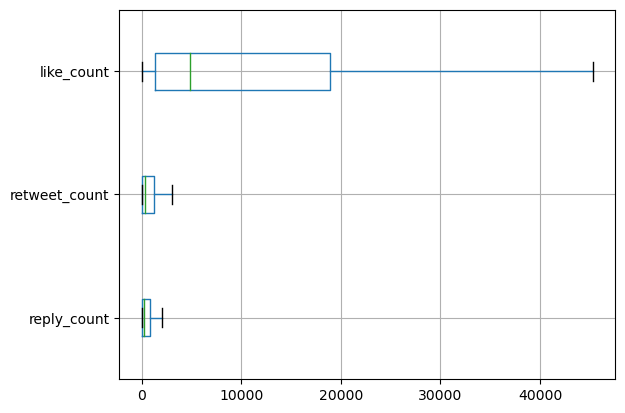

In [31]:
data.boxplot(column=['reply_count', 'retweet_count', 'like_count'], showfliers= False, vert=False)
plt.show()

### We notice the scales against which we are measuring likes, RT and reply are not the same, but it's ok, because these measures are highly correlated

In [32]:
corr_num=data.corr()
corr_num

/var/folders/5g/jskfzb8j377fh7wl3_rxvkrc0000gn/T/ipykernel_8995/963562844.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_num=data.corr()


,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_val,mostment
reply_count,1.000000,0.731378,0.812238,0.184486,0.180346,-0.010279,-0.133772
retweet_count,0.731378,1.000000,0.920335,0.084760,0.090934,-0.017313,-0.136061
like_count,0.812238,0.920335,1.000000,0.134076,0.142448,-0.018899,-0.153243
follower_count,0.184486,0.084760,0.134076,1.000000,0.889305,-0.041047,-0.032177
friends_count,0.180346,0.090934,0.142448,0.889305,1.000000,-0.031335,-0.036208
sentiment_val,-0.010279,-0.017313,-0.018899,-0.041047,-0.031335,1.000000,-0.022148
mostment,-0.133772,-0.136061,-0.153243,-0.032177,-0.036208,-0.022148,1.000000


<Axes: >

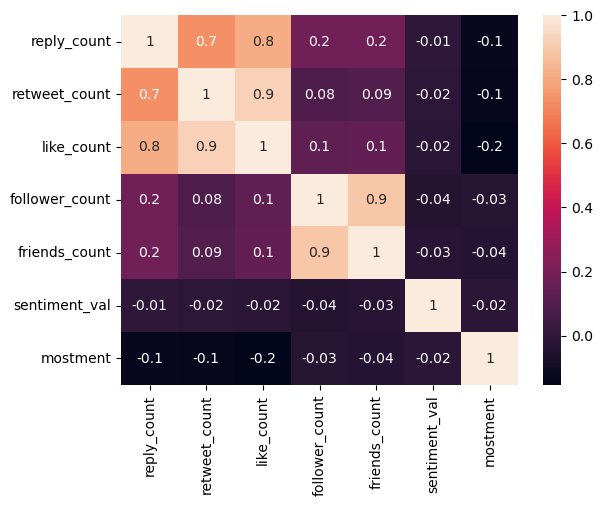

In [33]:
sns.heatmap(corr_num, annot=True, fmt='.1g',)

# Does the message tone matter ? 

In [42]:
sentimentlikes=pd.DataFrame(data[['sentiment_cat', 'like_count','reply_count', 'retweet_count']].groupby(['sentiment_cat']).mean().reset_index())
sentimentlikes.set_index('sentiment_cat', inplace=True)
sentimentlikes

,like_count,reply_count,retweet_count
sentiment_cat,,,
negative,42716.865865,2610.538390,4442.815911
neutral,34034.197125,1749.105656,3110.807168
positive,29789.582524,1454.223118,2467.831288


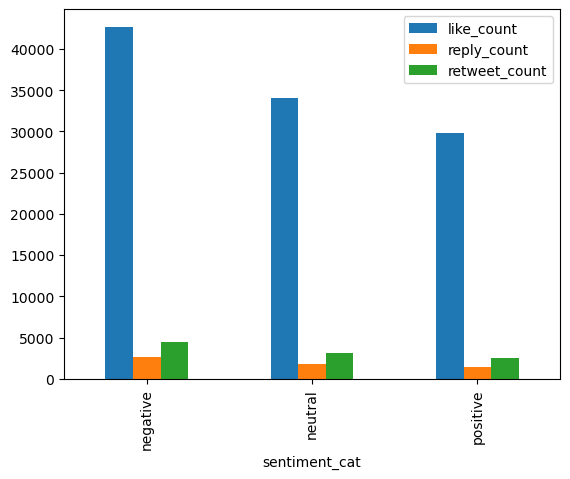

In [35]:
sentimentlikes.plot.bar()
plt.show()

# Do your friends matter ?

In [38]:
tweetswithtop.head()

,date,time_recoded,access_point,language,text,mentions,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_cat,sentiment_val,mostment
tweet_id,,,,,,,,,,,,,,
1575508878300618752,2022-09-29,15:32:42,Twitter for iPhone,en,@WholeMarsBlog Off-label use 🤣,WholeMarsBlog,754,492,23482,107414837,122,neutral,0.753030,True
1575377995371454464,2022-09-29,06:52:37,Twitter for iPhone,en,@WholeMarsBlog @Gfilche There will be lots of ...,"WholeMarsBlog,Gfilche",318,350,4508,107414837,122,positive,0.923691,True
1575227124931530753,2022-09-28,20:53:07,Twitter for iPhone,en,@BryceSpaceTech @SpaceX Still very tiny potato...,"BryceSpaceTech,SpaceX",685,453,2967,107414837,122,neutral,0.610722,True
1575226816347852800,2022-09-28,20:51:53,Twitter for iPhone,en,@BryceSpaceTech @SpaceX SpaceX now delivering ...,"BryceSpaceTech,SpaceX",759,1092,14924,107414837,122,neutral,0.637357,True
1575210561964384258,2022-09-28,19:47:18,Twitter for iPhone,en,"@Teslarati @KlenderJoey How ironic, that’s wha...","Teslarati,KlenderJoey",355,301,5038,107414837,122,neutral,0.519457,True


In [39]:
tweetswithouttop.head()

,date,time_recoded,access_point,language,text,mentions,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_cat,sentiment_val,mostment
tweet_id,,,,,,,,,,,,,,
1575581872913907712,2022-09-29,20:22:46,Twitter for iPhone,en,@MuskUniversity True,MuskUniversity,377,127,3007,107414837,122,neutral,0.600531,False
1575509494510993408,2022-09-29,15:35:09,Twitter for iPhone,en,Needs be able to get from Starbase to South Pa...,_,1604,1416,33556,107414837,122,neutral,0.845257,False
1575508498430820352,2022-09-29,15:31:12,Twitter for iPhone,en,Cybertruck will be waterproof enough to serve ...,_,12870,9732,124276,107414837,122,positive,0.611826,False
1575507735298207744,2022-09-29,15:28:10,Twitter for iPhone,en,@phibetakitten Submarines use electric motors ...,phibetakitten,509,347,8189,107414837,122,neutral,0.859709,False
1575507004407226374,2022-09-29,15:25:16,Twitter for iPhone,en,Works on land too,_,1005,468,11234,107414837,122,neutral,0.842831,False


In [40]:
friends=pd.DataFrame(tweetswithtop[['sentiment_cat', 'like_count','reply_count', 'retweet_count']].groupby(['sentiment_cat']).mean().reset_index())
friends.set_index('sentiment_cat', inplace=True)
friends

,like_count,reply_count,retweet_count
sentiment_cat,,,
negative,9553.414552,613.495770,669.147208
neutral,7936.978698,407.363336,429.123012
positive,9232.771930,409.753254,504.454443


In [41]:
notfriends=pd.DataFrame(tweetswithouttop[['sentiment_cat', 'like_count','reply_count', 'retweet_count']].groupby(['sentiment_cat']).mean().reset_index())
notfriends.set_index('sentiment_cat', inplace=True)
notfriends

,like_count,reply_count,retweet_count
sentiment_cat,,,
negative,55192.740929,3361.812858,5862.445576
neutral,45818.783092,2354.989297,4321.761414
positive,39628.121073,1954.108884,3407.508126


In [52]:
friendsornot=friends.join(notfriends, lsuffix="friends")
friendsornot.columns=['TW_with_top_mentions_likes', 'TW_with_top_mentions_replies', 'TW_with_top_mentions_RT',
       'regular_tw_likes', 'regular_tw_replies', 'regular_tw_RT']
friendsornot

,TW_with_top_mentions_likes,TW_with_top_mentions_replies,TW_with_top_mentions_RT,regular_tw_likes,regular_tw_replies,regular_tw_RT
sentiment_cat,,,,,,
negative,9553.414552,613.495770,669.147208,55192.740929,3361.812858,5862.445576
neutral,7936.978698,407.363336,429.123012,45818.783092,2354.989297,4321.761414
positive,9232.771930,409.753254,504.454443,39628.121073,1954.108884,3407.508126


<Axes: xlabel='sentiment_cat'>

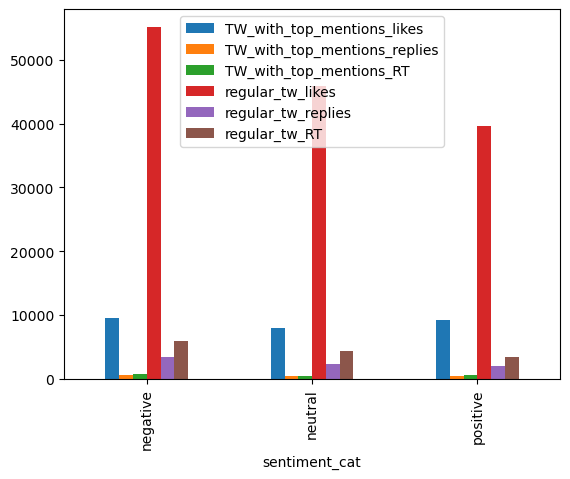

In [53]:
friendsornot.plot.bar()

In [56]:
engagement_friends=friendsornot.drop(columns=['TW_with_top_mentions_replies', 'TW_with_top_mentions_RT','regular_tw_replies', 'regular_tw_RT'])
engagement_friends

,TW_with_top_mentions_likes,regular_tw_likes
sentiment_cat,,
negative,9553.414552,55192.740929
neutral,7936.978698,45818.783092
positive,9232.771930,39628.121073


<function matplotlib.pyplot.show(close=None, block=None)>

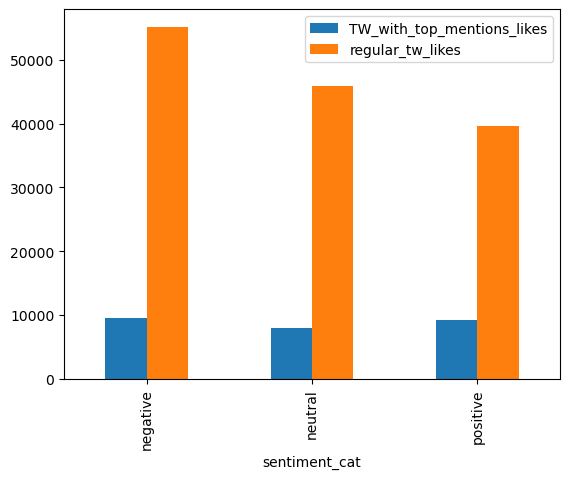

In [58]:
engagement_friends.plot.bar()
plt.show

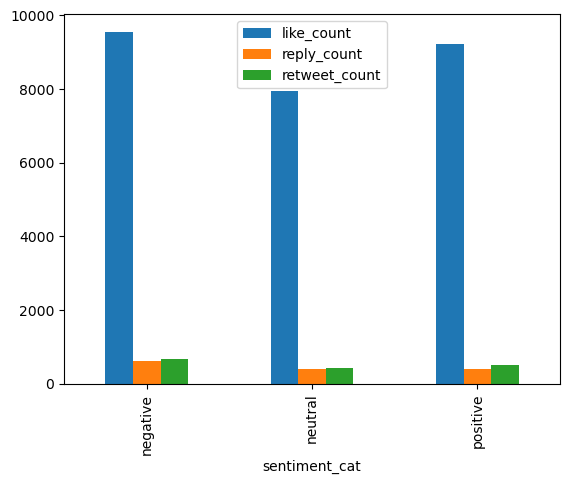

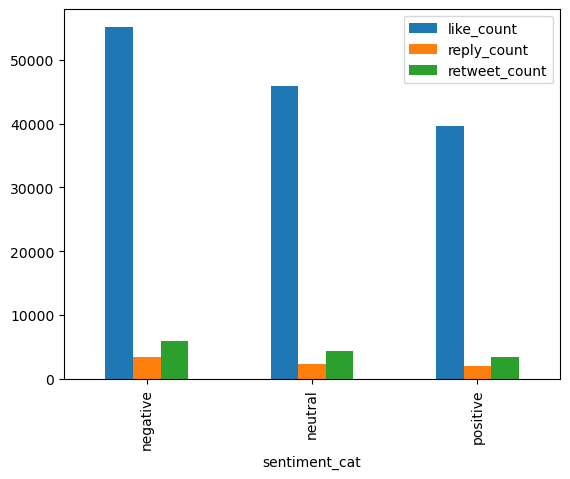

In [46]:
friends.plot.bar()
notfriends.plot.bar()
plt.show()

In [64]:
data.columns

Index(['date', 'time_recoded', 'access_point', 'language', 'text', 'mentions',
       'reply_count', 'retweet_count', 'like_count', 'follower_count',
       'friends_count', 'sentiment_cat', 'sentiment_val', 'mostment'],
      dtype='object')

In [73]:
top_tweets=data.loc[data['like_count'] > 1000000].sort_values('like_count', ascending=False)
top_tweets[0:10].describe()

,reply_count,retweet_count,like_count,follower_count,friends_count,sentiment_val
count,10.000000,10.000000,1.000000e+01,1.000000e+01,10.000000,10.000000
mean,121332.000000,284444.100000,2.534795e+06,1.089787e+08,123.600000,0.648130
std,44323.589902,157365.895169,9.548598e+05,3.299231e+06,3.373096,0.196078
min,76701.000000,174376.000000,1.566856e+06,1.074129e+08,122.000000,0.476406
25%,84135.500000,195806.250000,1.891126e+06,1.074130e+08,122.000000,0.490497
50%,104730.000000,212835.500000,2.497502e+06,1.074140e+08,122.000000,0.563456
75%,150258.000000,329337.250000,2.654245e+06,1.074150e+08,122.000000,0.778422
max,194791.000000,686210.000000,4.799760e+06,1.152386e+08,130.000000,0.975814


In [80]:
list(top_tweets[0:10]['text'])

['Next I’m buying Coca-Cola to put the cocaine back in',
 'I hope that even my worst critics remain on Twitter, because that is what free speech means',
 'Let’s make Twitter maximum fun!',
 '🚀💫♥️ Yesss!!! ♥️💫🚀 https://t.co/0T9HzUHuh6',
 'Listen, I can’t do miracles ok https://t.co/z7dvLMUXy8',
 'Comedy is now legal on Twitter',
 'If I die under mysterious circumstances, it’s been nice knowin ya',
 'https://t.co/kGncG7Hs3M',
 'The extreme antibody reaction from those who fear free speech says it all',
 'https://t.co/Q9OjlJhi7f']